In [1]:
# Data processing libraries
import numpy as np
import pandas as pd
import os 
from glob import glob
# Graphic tools 
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
#Final word cloud after all the cleaning and pre-processing
from wordcloud import WordCloud, STOPWORDS

In [2]:
def path_csvFiles (PATH = os.getcwd(),EXT = "*.csv"):  
    """
    Retrieve all files with a given extension (EXT = *.csv by default) from current
    working directory where the process is being implemented, using os.getcwd () 
    and the glob module, which finds all path names that resemble a specified pattern 
    according to the rules that are followed in a Unix terminal.
    
    Returns:
        Returns a list with all the files path of the given extension 
    """
    list_paths = []
    for path, subdir, files in os.walk(PATH):
        for file in glob(os.path.join(path, EXT)):
            list_paths.append(file)
    return list_paths


def concat_paths(all_paths):
    """receives a list of file directories with a CSV extension 
    and creates a dataset by concatenating each file
    and assigning each file a year label that is stored in the "Year" column,
    returning a dataframe

    Returns: 
        Returns a dataframe
    """

    all_df = []
    for path in all_paths:
        df = pd.read_csv(path, sep = ';')
        df['Year'] = int(path.split()[1])
        all_df.append(df)
    
    df = pd.concat(all_df, ignore_index=True)
    return df 

In [3]:
df = concat_paths(path_csvFiles())
df.head(5)

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Quartile,H index,Total Docs. (2008),Total Docs. (3years),...,Total Docs. (2002),Total Docs. (2009),Total Docs. (2007),Total Docs. (2011),Total Docs. (2018),Total Docs. (2000),Total Docs. (2003),Total Docs. (2020),Total Docs. (2001),Total Docs. (2017)
0,1,12872,Cognitive Psychology,journal,"10955623, 00100285","3,499",Q1,123,21.0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,23127,Journal of the ACM,journal,"00045411, 1557735X","3,301",Q1,131,28.0,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,24254,IEEE Transactions on Pattern Analysis and Mach...,journal,01628828,"2,979",Q1,377,186.0,562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,22478,Journal of Memory and Language,journal,"10960821, 0749596X","2,669",Q1,156,85.0,194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,24242,IEEE Transactions on Fuzzy Systems,journal,10636706,"2,581",Q1,202,134.0,250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

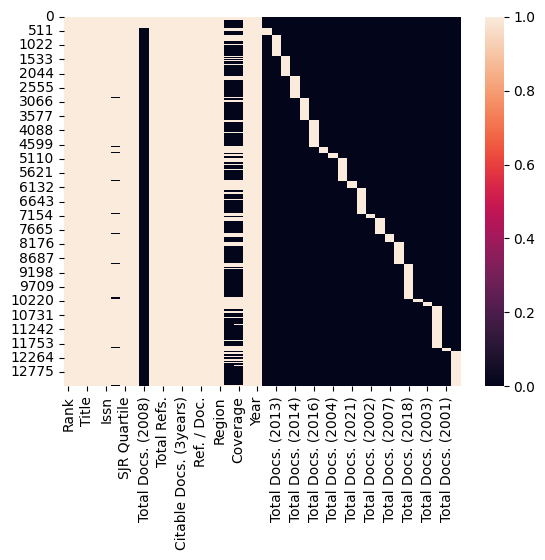

In [4]:
#Visualización de las columnas que representan vacios para eliminarlas
sns.heatmap(df.notnull())

<AxesSubplot: >

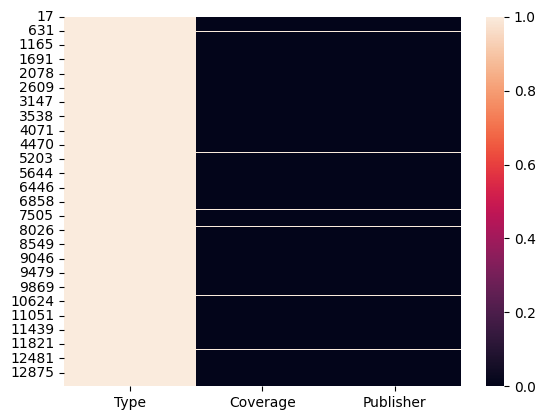

In [5]:
# =============================================================================
# Plot rectangular df as a color-encoded matrix. 
# =============================================================================
sns.heatmap(df[(df['Type'] == "conference and proceedings")][["Type","Coverage","Publisher"]].notnull())

In [6]:
#Preprocessing data

#eliminar registros conference
df = df.loc[(df['Type'] == 'journal') | (df['Type'] == 'book series')]

In [7]:
#eliminar columnas
df.drop(list(df.filter(regex  = '20')), inplace = True, axis=1)


In [8]:
# =============================================================================
# Types columns
# =============================================================================
df.dtypes

Rank                       int64
Sourceid                   int64
Title                     object
Type                      object
Issn                      object
SJR                       object
SJR Quartile              object
H index                    int64
Total Docs. (3years)       int64
Total Refs.                int64
Total Cites (3years)       int64
Citable Docs. (3years)     int64
Cites / Doc. (2years)     object
Ref. / Doc.               object
Country                   object
Region                    object
Publisher                 object
Coverage                  object
Categories                object
Year                       int64
dtype: object

In [9]:
for i in (5, 12, 13):
    print(f"\033[1m {df.columns[i]}:\n\033[0m {list((df[df.columns[i]]))[:30]}\n")
    

 SJR:
 ['3,499', '3,301', '2,979', '2,669', '2,581', '2,390', '2,121', '2,052', '1,880', '1,850', '1,829', '1,724', '1,698', '1,544', '1,539', '1,531', '1,449', '1,323', '1,295', '1,196', '1,160', '1,141', '1,123', '1,121', '1,026', '0,973', '0,919', '0,914', '0,913', '0,899']

 Cites / Doc. (2years):
 ['4,38', '3,30', '8,76', '3,44', '4,63', '5,89', '3,67', '2,95', '1,32', '4,65', '4,31', '3,69', '4,73', '3,86', '2,19', '1,58', '2,82', '3,75', '3,96', '3,43', '2,02', '3,11', '3,34', '2,46', '2,43', '2,85', '2,14', '1,58', '2,28', '2,81']

 Ref. / Doc.:
 ['75,57', '34,86', '34,25', '55,89', '33,21', '39,24', '31,62', '51,05', '43,42', '35,26', '46,58', '29,08', '42,78', '33,27', '27,30', '22,41', '104,67', '34,15', '37,97', '31,53', '29,56', '32,43', '27,24', '31,04', '30,92', '37,49', '49,15', '28,43', '30,78', '24,63']



In [10]:
df['SJR'] = (df['SJR'].replace(',','.', regex=True).astype(float)).fillna(0)

In [11]:
df['Cites / Doc. (2years)'] = (df['Cites / Doc. (2years)'].replace(',','.', regex=True).astype(float))


In [12]:
df['Ref. / Doc.'] = (df['Ref. / Doc.'].replace(',','.', regex=True).astype(float))

<AxesSubplot: >

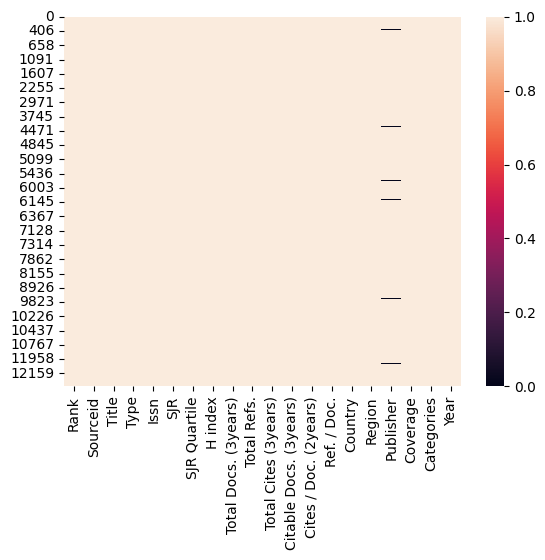

In [13]:
sns.heatmap(df.notnull())

In [14]:
# =============================================================================
# Numeric columns
# =============================================================================
int_df = df.select_dtypes(include=['int64']).copy()
print(f"[{len(int_df)} rows x {len(int_df.columns)} columns]")

[3575 rows x 8 columns]


In [15]:
# =============================================================================
# summarize the central tendency, dispersion and shape of a dataset’s distribution.
# =============================================================================
int_df.describe()

,Rank,Sourceid,H index,Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Year
count,3575.000000,3.575000e+03,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000
mean,219.501818,7.036154e+09,61.194406,219.860979,2950.876084,626.726713,207.285035,2012.398322
std,305.099413,9.545632e+09,56.917252,379.044330,5835.449234,1828.225794,361.225398,6.163479
min,1.000000,1.223700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000
25%,47.000000,2.414100e+04,21.000000,62.000000,731.000000,51.000000,56.000000,2008.000000
50%,101.000000,2.548200e+04,45.000000,112.000000,1321.000000,152.000000,102.000000,2013.000000
75%,219.000000,1.990019e+10,79.000000,216.000000,2857.000000,428.000000,201.000000,2018.000000
max,1491.000000,2.110106e+10,377.000000,4239.000000,86050.000000,26359.000000,4154.000000,2021.000000


In [16]:
# =============================================================================
# Categorical columns
# =============================================================================
obj_df = df.select_dtypes(include=['object']).copy()
print(f"[{len(obj_df)} rows x {len(obj_df.columns)} columns]")


[3575 rows x 9 columns]


In [17]:
obj_df.describe()

,Title,Type,Issn,SJR Quartile,Country,Region,Publisher,Coverage,Categories
count,3575,3575,3575,3575,3575,3575,3528,3575,3575
unique,273,2,273,5,34,8,134,104,1033
top,Cognitive Psychology,journal,"10955623, 00100285",Q1,United States,Western Europe,Springer Netherlands,1995-2021,Artificial Intelligence (Q4); Software (Q4)
freq,22,3418,22,796,876,1986,396,132,88


In [18]:
# =============================================================================
# Categorical columns sets
# =============================================================================
i=0
while i<len(obj_df.columns):    
    print(("\033[1m {}: \n \033[0m {}\n").format(obj_df.columns[i],list(set(obj_df[obj_df.columns[i]]))[:30]))
    i+=1

 Title: 
  ['International Journal of Computational Intelligence in Control (discontinued)', 'Evolutionary Intelligence', 'International Journal of Swarm Intelligence Research', 'Connection Science', 'Transactions of the Japanese Society for Artificial Intelligence', 'Nature Machine Intelligence', 'Journal of Software (discontinued)', 'International Journal of Computer Information Systems and Industrial Management Applications', 'Computational Visual Media', 'Frontiers in Artificial Intelligence and Applications', 'Journal of Scheduling', 'Journal of the ACM', 'Neural, Parallel and Scientific Computations (discontinued)', 'IEEE Transactions on Games', 'International Journal of Engineering Research and Technology (discontinued)', 'International Journal of Semantic Computing', 'International Journal of Computing and Digital Systems', 'International Journal of Fuzzy Systems', 'Advances in Computer Vision and Pattern Recognition', 'Systems Science and Control Engineering', 'ACM Transaction

In [ ]:
text = df['Title'].values 

print(len(set(text)))
wordcloud = WordCloud(width = 2000, height = 2000, 
            background_color = 'white', 
            stopwords = STOPWORDS, 
            min_font_size = 2,
            max_font_size = 100).generate(str(text)) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

print(STOPWORDS)